In [58]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import json

In [59]:
raw_data_path = os.path.join(os.path.pardir,"data","raw", "heart_failure_clinical_records_dataset.csv")
processed_data_path = os.path.join(os.path.pardir,"data","processed", "processed.csv")
numeric_imputed_json_path = os.path.join(os.path.pardir,"static_data","numeric_imputed_values.json")
categorical_imputed_json_path = os.path.join(os.path.pardir,"static_data","categorical_imputed_values.json")
#train_data_path = os.path.join(os.path.pardir,"data","raw", "train.csv")
#test_data_path = os.path.join(os.path.pardir,"data","raw", "test.csv")

In [60]:
df = pd.read_csv(raw_data_path)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
age                         300 non-null float64
anaemia                     300 non-null int64
creatinine_phosphokinase    299 non-null float64
diabetes                    300 non-null int64
ejection_fraction           299 non-null float64
high_blood_pressure         300 non-null int64
platelets                   300 non-null float64
serum_creatinine            300 non-null float64
serum_sodium                300 non-null int64
sex                         300 non-null int64
smoking                     300 non-null int64
time                        300 non-null int64
DEATH_EVENT                 300 non-null int64
dtypes: float64(5), int64(8)
memory usage: 30.5 KB


In [5]:
X = df.iloc[:,:-1]

In [6]:
y = df.iloc[:,-1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
df.shape

(299, 13)

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [34]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [91]:
%matplotlib inline

In [92]:
#data columns
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [42]:
#separating feature and target
model_features = df.columns.drop('DEATH_EVENT')
model_target = 'DEATH_EVENT'

print(model_features)
print(model_target)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')
DEATH_EVENT


In [94]:
#convert Categorical value to 'Y' and 'N' from 0 and 1
#df['anaemia'] = df['anaemia'].apply(lambda x: 'Y' if x == 1 else 'N')    
#df['diabetes'] = df['diabetes'].apply(lambda x: 'Y' if x == 1 else 'N')
#df['high_blood_pressure'] = df['high_blood_pressure'].apply(lambda x: 'Y' if x == 1 else 'N')  
#df['smoking'] = df['smoking'].apply(lambda x: 'Y' if x == 1 else 'N') 
#df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')

In [51]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [43]:
import numpy as np

numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print("Numerical colums", numerical_features_all)

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print("Categorical features",categorical_features_all)

Numerical colums Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')
Categorical features Index([], dtype='object')


In [17]:
#Plots

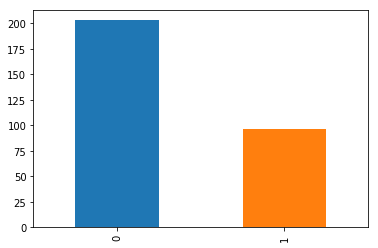

In [10]:
%matplotlib inline
df[model_target].value_counts().plot(kind='bar')

In [19]:
#show all unique categories for categorical features
for c in categorical_features_all:
    print(df[c].value_counts())

N    170
Y    129
Name: anaemia, dtype: int64
N    174
Y    125
Name: diabetes, dtype: int64
N    194
Y    105
Name: high_blood_pressure, dtype: int64
male      194
female    105
Name: sex, dtype: int64
N    203
Y     96
Name: smoking, dtype: int64


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#show all unique categories for categorical features
for c in categorical_features_all:
    df[c].value_counts().plot.bar()
    print("Feature",c)
    plt.show()

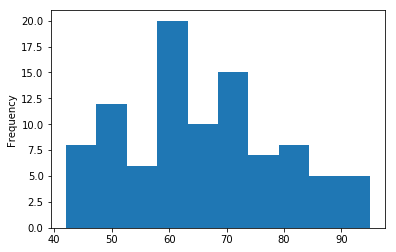

In [11]:
df[df.DEATH_EVENT == 1].age.plot(kind='hist',bins=10)

# plot all numerical features
import matplotlib.pyplot as plt
%matplotlib inline


for c in numerical_features_all:
    df[c].plot.hist(bins=20)
    print("Feature: ", c)
    plt.show()

Box plot for  age


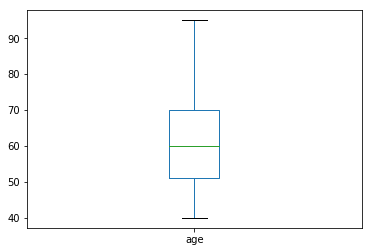

Box plot for  creatinine_phosphokinase


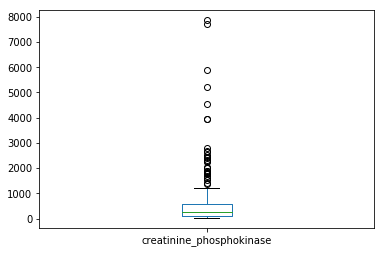

Box plot for  ejection_fraction


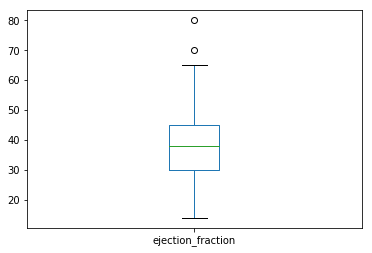

Box plot for  platelets


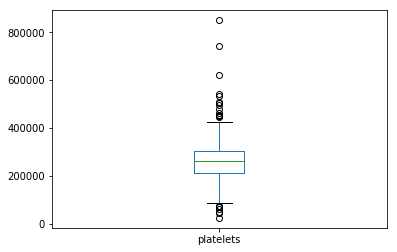

Box plot for  serum_creatinine


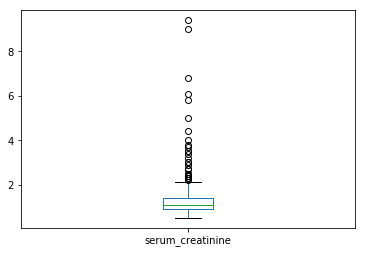

Box plot for  serum_sodium


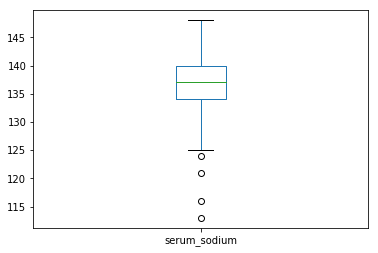

Box plot for  time


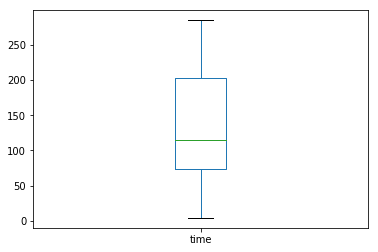

In [23]:
#Detect outliers in model numerical features
for c in numerical_features_all:
    df[c].plot.box()
    print("Box plot for ",c)
    plt.show()

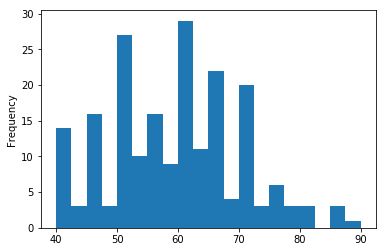

In [33]:
df[df.DEATH_EVENT != 1].age.plot(kind='hist',bins=20)

In [44]:
#removing outliers
for c in numerical_features_all:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3-Q1
    print("column:", c)
    print("Lower level:",Q1-1.5*IQR," Upper level:",Q3+1.5*IQR)
    print("Shape before drop: ", df[c].shape)
    dropIndexes = df[df[c] < Q1-1.5*IQR].index
    df.drop(dropIndexes,inplace=True)
    dropIndexes = df[df[c] > Q3+1.5*IQR].index
    df.drop(dropIndexes,inplace=True)
    print("Shape after drop: ", df[c].shape)

column: age
Lower level: 21.875  Upper level: 98.875
Shape before drop:  (300,)
Shape after drop:  (300,)
column: anaemia
Lower level: -1.5  Upper level: 2.5
Shape before drop:  (300,)
Shape after drop:  (300,)
column: creatinine_phosphokinase
Lower level: -581.75  Upper level: 1280.25
Shape before drop:  (300,)
Shape after drop:  (271,)
column: diabetes
Lower level: -1.5  Upper level: 2.5
Shape before drop:  (271,)
Shape after drop:  (271,)
column: ejection_fraction
Lower level: 7.5  Upper level: 67.5
Shape before drop:  (271,)
Shape after drop:  (269,)
column: high_blood_pressure
Lower level: -1.5  Upper level: 2.5
Shape before drop:  (269,)
Shape after drop:  (269,)
column: platelets
Lower level: 75500.0  Upper level: 439500.0
Shape before drop:  (269,)
Shape after drop:  (251,)
column: serum_creatinine
Lower level: 0.15000000000000024  Upper level: 2.1499999999999995
Shape before drop:  (251,)
Shape after drop:  (228,)
column: serum_sodium
Lower level: 125.0  Upper level: 149.0
Sha

Box plot for  age


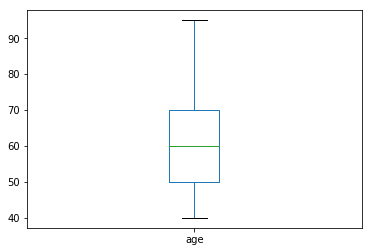

Box plot for  anaemia


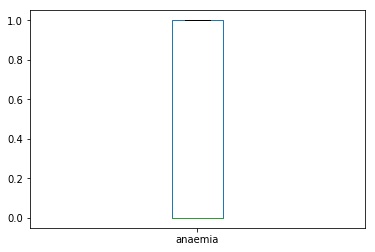

Box plot for  creatinine_phosphokinase


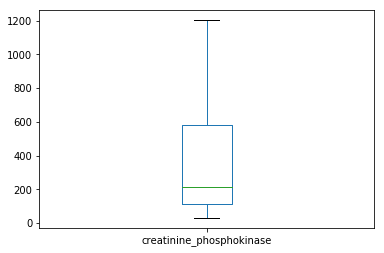

Box plot for  diabetes


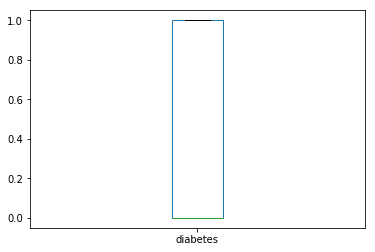

Box plot for  ejection_fraction


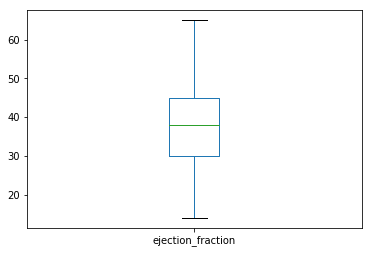

Box plot for  high_blood_pressure


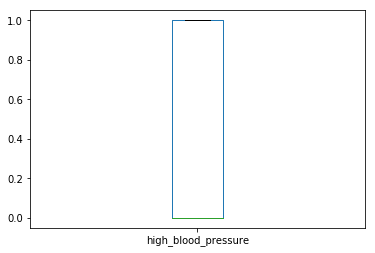

Box plot for  platelets


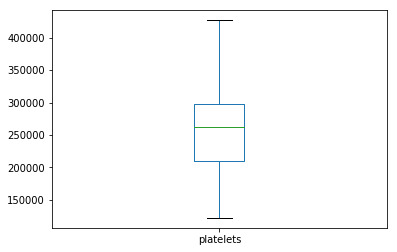

Box plot for  serum_creatinine


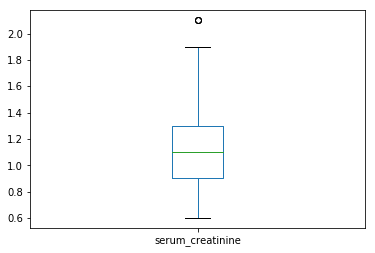

Box plot for  serum_sodium


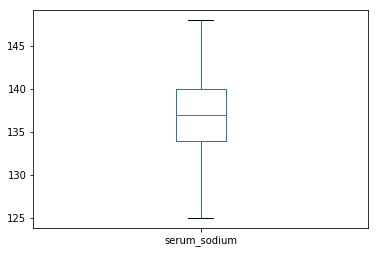

Box plot for  sex


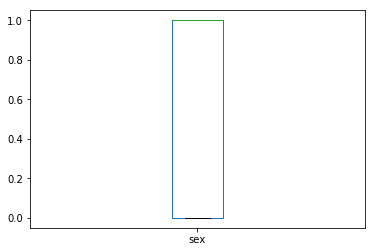

Box plot for  smoking


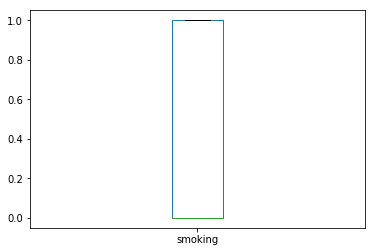

Box plot for  time


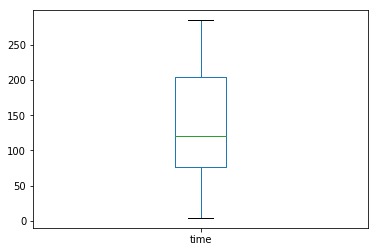

In [15]:
#Detect outliers in model numerical features
for c in numerical_features_all:
    df[c].plot.box()
    print("Box plot for ",c)
    plt.show()

In [10]:
#check correlation between numerical featues
for i in range(0,len(numerical_features_all)):
    #print(len(numerical_features_all))
    j=i+1
    while j <= len(numerical_features_all)-1:
        print(i,j)
        cols=[numerical_features_all[i],numerical_features_all[j]]
        print(df[cols].corr())
        j+=1

0 1
                               age  creatinine_phosphokinase
age                       1.000000                  0.029417
creatinine_phosphokinase  0.029417                  1.000000
0 2
                        age  ejection_fraction
age                1.000000           0.085668
ejection_fraction  0.085668           1.000000
0 3
                age  platelets
age        1.000000  -0.090753
platelets -0.090753   1.000000
0 4
                       age  serum_creatinine
age               1.000000          0.277358
serum_creatinine  0.277358          1.000000
0 5
                   age  serum_sodium
age           1.000000     -0.024793
serum_sodium -0.024793      1.000000
0 6
           age      time
age   1.000000 -0.227897
time -0.227897  1.000000
1 2
                          creatinine_phosphokinase  ejection_fraction
creatinine_phosphokinase                  1.000000          -0.124547
ejection_fraction                        -0.124547           1.000000
1 3
                    

In [11]:
df.plot.scatter(x='age',y='serum_sodium')

# Missing Data

In [16]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [56]:
#Impute numerical feature missing with mean value
df_imputed = df.copy()

#impute two or more numerical features
df_imputed[numerical_features_all] = df_imputed[numerical_features_all].fillna(df_imputed[numerical_features_all].mean())
print(df_imputed.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [53]:
numerical_imputation_json = df_imputed[numerical_features_all].mean().to_json(orient="index")
with open(numeric_imputed_json_path,"w") as jsonfile:
    jsonfile.write(numerical_imputation_json)

In [62]:
#Impute categorical feature missing with Mode (most frequent) value
mode_dict = dict()
#df_imputed = df.copy()

#identify the mode
for c in df[categorical_features_all]:
    mode_value = df_imputed[c].mode()
    mode_dict[c] = mode_value

#impute feature with mode
    df_imputed[c].fillna(mode_value,inplace=True)

print(df_imputed.isna().sum())


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [63]:
categorical_imputation_json = json.dumps(mode_dict)
with open(categorical_imputed_json_path,"w") as jsonfile:
    jsonfile.write(categorical_imputation_json)

In [41]:
pd.crosstab(df.DEATH_EVENT,df.anaemia)

anaemia,0,1
DEATH_EVENT,,
0,120,83
1,50,46


In [46]:
pd.crosstab(df.DEATH_EVENT,df.diabetes)

diabetes,0,1
DEATH_EVENT,,
0,118,85
1,56,40


In [20]:
df[numerical_features_all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 298
Data columns (total 7 columns):
age                         224 non-null float64
creatinine_phosphokinase    224 non-null int64
ejection_fraction           224 non-null int64
platelets                   224 non-null float64
serum_creatinine            224 non-null float64
serum_sodium                224 non-null int64
time                        224 non-null int64
dtypes: float64(3), int64(4)
memory usage: 14.0 KB


# Correlation analysis 

In [58]:
df[numerical_features_all].corr().apply(lambda x: x.round(2))

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.00,0.03,0.09,-0.09,0.28,-0.02,-0.23
creatinine_phosphokinase,0.03,1.00,-0.12,0.03,0.12,-0.12,0.12
ejection_fraction,0.09,-0.12,1.00,0.08,-0.20,0.17,0.06
platelets,-0.09,0.03,0.08,1.00,-0.03,0.01,0.04
serum_creatinine,0.28,0.12,-0.20,-0.03,1.00,-0.22,-0.11
serum_sodium,-0.02,-0.12,0.17,0.01,-0.22,1.00,0.03
time,-0.23,0.12,0.06,0.04,-0.11,0.03,1.00


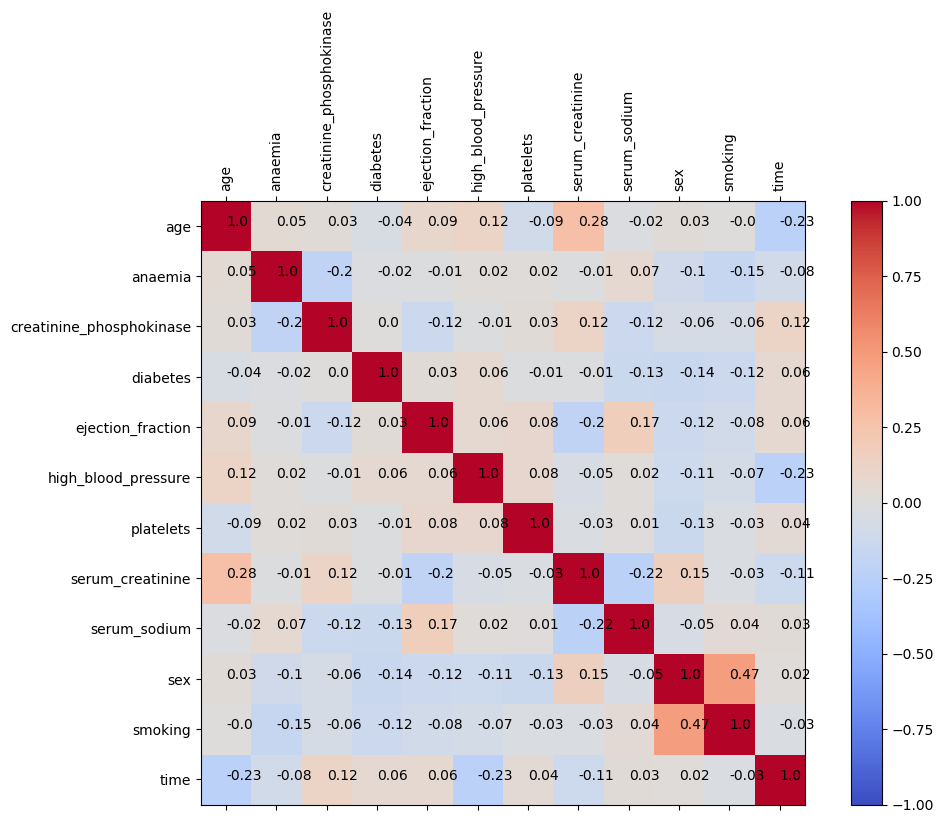

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt


corr = df[numerical_features_all].corr().apply(lambda x: x.round(2))
fig = plt.figure(figsize=(12,8),dpi=100)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm',vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df[numerical_features_all].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
#ax.annotate(str(cax.value),xy=(ticks,ticks))
ax.set_yticks(ticks)
ax.set_xticklabels(df[numerical_features_all].columns)
ax.set_yticklabels(df[numerical_features_all].columns)
for (x,y),val in np.ndenumerate(corr):
    #ax.text(pos,pos,'{}'.format(corr[[col,col]]),ha='center',va='center')
    ax.annotate('{}'.format(val),xy=(x,y))
plt.show()

In [28]:
df[["age","serum_creatinine"]].corr()

,age,serum_creatinine
age,1.000000,0.277358
serum_creatinine,0.277358,1.000000


# Feature Encoding

In [98]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [7]:
df = df.astype({"age":"int8"})

In [8]:
#cut equal size bins for age with actual frequency..use qcut where unequal bins but distribution of value
%timeit
age_bins=[0,5,15,30,45,60,75,90,105]
age_labels = ["kid","teen","young","midage","upperage","senior","old","veryold"]
df["age"] = pd.cut(df["age"],bins=age_bins,labels=age_labels)
qcut_labels = ["verylow","low","med","high","veryhigh"] 
df["creatinine_phosphokinase"] = pd.qcut(df["creatinine_phosphokinase"],q=5,labels=qcut_labels)
#df["ejection_fraction"] = pd.qcut(df["ejection_fraction"]),q=5,lables=qcut_labels)
df["platelets"] = pd.qcut(df["platelets"],q=5,labels=qcut_labels)
df["serum_creatinine"]=pd.qcut(df["serum_creatinine"],q=5,labels=qcut_labels)
#df["serum_sodium"] = pd.qcut(df["serum_sodium"],q=5,labels=qcut_labels)
#df["time"] = pd.qcut(df["time"],q=5,labels=qcut_labels)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 298
Data columns (total 13 columns):
age                         224 non-null category
anaemia                     224 non-null int64
creatinine_phosphokinase    224 non-null category
diabetes                    224 non-null int64
ejection_fraction           224 non-null int64
high_blood_pressure         224 non-null int64
platelets                   224 non-null category
serum_creatinine            224 non-null category
serum_sodium                224 non-null int64
sex                         224 non-null int64
smoking                     224 non-null int64
time                        224 non-null int64
DEATH_EVENT                 224 non-null int64
dtypes: category(4), int64(9)
memory usage: 19.3 KB


In [9]:
#Perform One hot encoding
df_encoded = pd.get_dummies(df)

In [10]:
#check for nulls
print(df_encoded.isna().sum())
print(df_encoded.info())

anaemia                              0
diabetes                             0
ejection_fraction                    0
high_blood_pressure                  0
serum_sodium                         0
sex                                  0
smoking                              0
time                                 0
DEATH_EVENT                          0
age_kid                              0
age_teen                             0
age_young                            0
age_midage                           0
age_upperage                         0
age_senior                           0
age_old                              0
age_veryold                          0
creatinine_phosphokinase_verylow     0
creatinine_phosphokinase_low         0
creatinine_phosphokinase_med         0
creatinine_phosphokinase_high        0
creatinine_phosphokinase_veryhigh    0
platelets_verylow                    0
platelets_low                        0
platelets_med                        0
platelets_high           

In [11]:
#move target column to the end of df
target = df_encoded[model_target]
df_encoded.drop(columns=[model_target], inplace=True)
df_encoded.insert(31,model_target,target)
print(df_encoded.head())

   anaemia  diabetes  ejection_fraction  high_blood_pressure  serum_sodium  \
0        0         0                 20                    1           130   
2        0         0                 20                    0           129   
3        1         0                 20                    0           137   
5        1         0                 40                    1           132   
6        1         0                 15                    0           137   

   sex  smoking  time  age_kid  age_teen     ...       platelets_low  \
0    1        0     4        0         0     ...                   0   
2    1        1     7        0         0     ...                   0   
3    1        0     7        0         0     ...                   1   
5    1        1     8        0         0     ...                   1   
6    1        0    10        0         0     ...                   0   

   platelets_med  platelets_high  platelets_veryhigh  \
0              1               0          

# Perform test train split

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_encoded,test_size=0.1,shuffle=True,random_state=23)

In [13]:
train_data.shape

(201, 32)

In [14]:
test_data.shape

(23, 32)

In [15]:
print("Model Target 0 values",train_data[train_data[model_target] == 0 ].shape)
print("Model Target 1 values",train_data[train_data[model_target] == 1 ].shape)

Model Target 0 values (150, 32)
Model Target 1 values (51, 32)


In [16]:
from sklearn.utils import shuffle
class_0 = train_data[train_data[model_target] == 0 ]
class_1 = train_data[train_data[model_target] == 1 ]

sampled_class_1 = class_1.sample(n=len(class_0),replace=True,random_state=42)

train_data = pd.concat([sampled_class_1,class_0])
train_data = shuffle(train_data)
print("Model Target 0 values after balancing",train_data[train_data[model_target] == 0 ].shape)
print("Model Target 1 values after balancing",train_data[train_data[model_target] == 1 ].shape)

Model Target 0 values after balancing (150, 32)
Model Target 1 values after balancing (150, 32)


In [17]:
train_data.shape

(300, 32)

# Applying scaler

In [210]:
from sklearn.preprocessing import MinMaxScaler

final_model_features = train_data.iloc[0:1,0:31].columns
#print("final model features", final_model_features)

X_train = train_data[final_model_features]
print(X_train.info())
y_train = train_data[model_target]
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
print(scaler.data_max_)
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 121 to 68
Data columns (total 31 columns):
anaemia                              300 non-null int64
diabetes                             300 non-null int64
ejection_fraction                    300 non-null int64
high_blood_pressure                  300 non-null int64
serum_sodium                         300 non-null int64
sex                                  300 non-null int64
smoking                              300 non-null int64
time                                 300 non-null int64
age_kid                              300 non-null uint8
age_teen                             300 non-null uint8
age_young                            300 non-null uint8
age_midage                           300 non-null uint8
age_upperage                         300 non-null uint8
age_senior                           300 non-null uint8
age_old                              300 non-null uint8
age_veryold                          300 non-null uint

,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,age_kid,age_teen,...,platelets_verylow,platelets_low,platelets_med,platelets_high,platelets_veryhigh,serum_creatinine_verylow,serum_creatinine_low,serum_creatinine_med,serum_creatinine_high,serum_creatinine_veryhigh
121,1,1,38,1,136,0,0,95,0,0,...,1,0,0,0,0,0,1,0,0,0
68,0,0,25,0,142,0,0,66,0,0,...,0,0,1,0,0,0,0,0,1,0
106,0,0,45,0,137,1,0,88,0,0,...,0,0,1,0,0,0,0,0,1,0
36,1,1,50,0,134,1,0,30,0,0,...,0,1,0,0,0,0,1,0,0,0
243,1,0,40,1,141,0,0,213,0,0,...,0,1,0,0,0,1,0,0,0,0


# Train KNN classifier - w/o pipeline

In [303]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,metric="manhattan")
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# use Pipeline for prediction

In [18]:
#use pipeline classsifier
final_model_features = train_data.iloc[0:1,0:31].columns
X_train = train_data[final_model_features]
y_train = train_data[model_target]

X_test = test_data[final_model_features]
y_test = test_data[model_target]

print("size_train",X_train.shape)
print("size_test",X_test.shape)

size_train (300, 31)
size_test (23, 31)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#pass K values a sqrt of n samples

classifier = Pipeline([('imputer',SimpleImputer(strategy='mean')),
    ('estimator',KNeighborsClassifier(n_neighbors=10,metric="manhattan"))   
])

#visualize pipeline
#from sklearn import set_config
#set_config(display='text')
classifier

# Train Pipeline clasiifier

In [324]:
classifier.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('estimator', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'))])

# Predict and score

In [325]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

#predict
train_prediction = classifier.predict(X_train)

In [326]:
#Model perforfance and report for Train data
print("Model perforfance ", confusion_matrix(y_train,train_prediction),end="\n")
print(classification_report(y_train,train_prediction),end="\n")
print("Model accuracy: ",accuracy_score(y_train,train_prediction),end="\n")

Model perforfance  [[139  11]
 [ 13 137]]
             precision    recall  f1-score   support

          0       0.91      0.93      0.92       150
          1       0.93      0.91      0.92       150

avg / total       0.92      0.92      0.92       300

Model accuracy:  0.92


In [327]:
#Model performance for Test data
X_test = test_data[final_model_features]
y_test=test_data[model_target]
test_prediction = classifier.predict(X_test)

print("Model perforfance ", confusion_matrix(y_test,test_prediction),end="\n")
print(classification_report(y_test,test_prediction),end="\n")
print("Model accuracy: ",accuracy_score(y_test,test_prediction),end="\n")

Model perforfance  [[13  0]
 [ 4  6]]
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.60      0.75        10

avg / total       0.87      0.83      0.82        23

Model accuracy:  0.8260869565217391
